### Import Packages

In [2]:
# Data
import pandas as pd

# Identification
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from numpy import reshape, vstack, zeros, linspace
import numpy as np
from _ident import Ident
from ezmod import alpha_filter

# Visualization
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Export

import pickle

#scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

## Import Data

In [130]:
# Importing data from the finalized data set
#df_5 = pd.read_excel('D50_full_01.xlsx',header=0,index_col=0)

# df= pd.read_excel('cube_interp.xlsx',header=0,index_col=0)#
#df= pd.read_excel('full_cleansed_data.xlsx',header=0)#,index_col=0)
#df_5.drop(columns=['minute'], inplace=True)

#87805 full cleansed data
#87812 full data set

#df0=pd.read_excel('smooth_interp.xlsx',header=0,index_col=0)
df2=pd.read_excel('CC_74869:184828.xlsx',header=0,index_col=0)
df3=pd.read_excel('CC_185802:229370.xlsx',header=0,index_col=0)

In [131]:
df2.columns = [ 'F', 'FW', 'P', 'MS', 'BP1_only','SW','SL','D','PS','CP','BP','D50'] ### *** change depend on data set
df3.columns = [ 'F', 'FW', 'P', 'MS', 'BP1_only','SW','SL','D','PS','CP','BP','D50'] ### *** change depend on data set


In [8]:
#df0.columns = [ 'F', 'FW', 'MS', 'PS', 'SW', 'BP', 'P', 'SL', 'D', 'CP','D50']

In [42]:
#df2=df2.reset_index()
#df3=df3.reset_index()

## Plot

In [9]:
# df0.plot(kind='line',subplots=True,layout=(14,1),figsize=(30,15))
# plt.show()

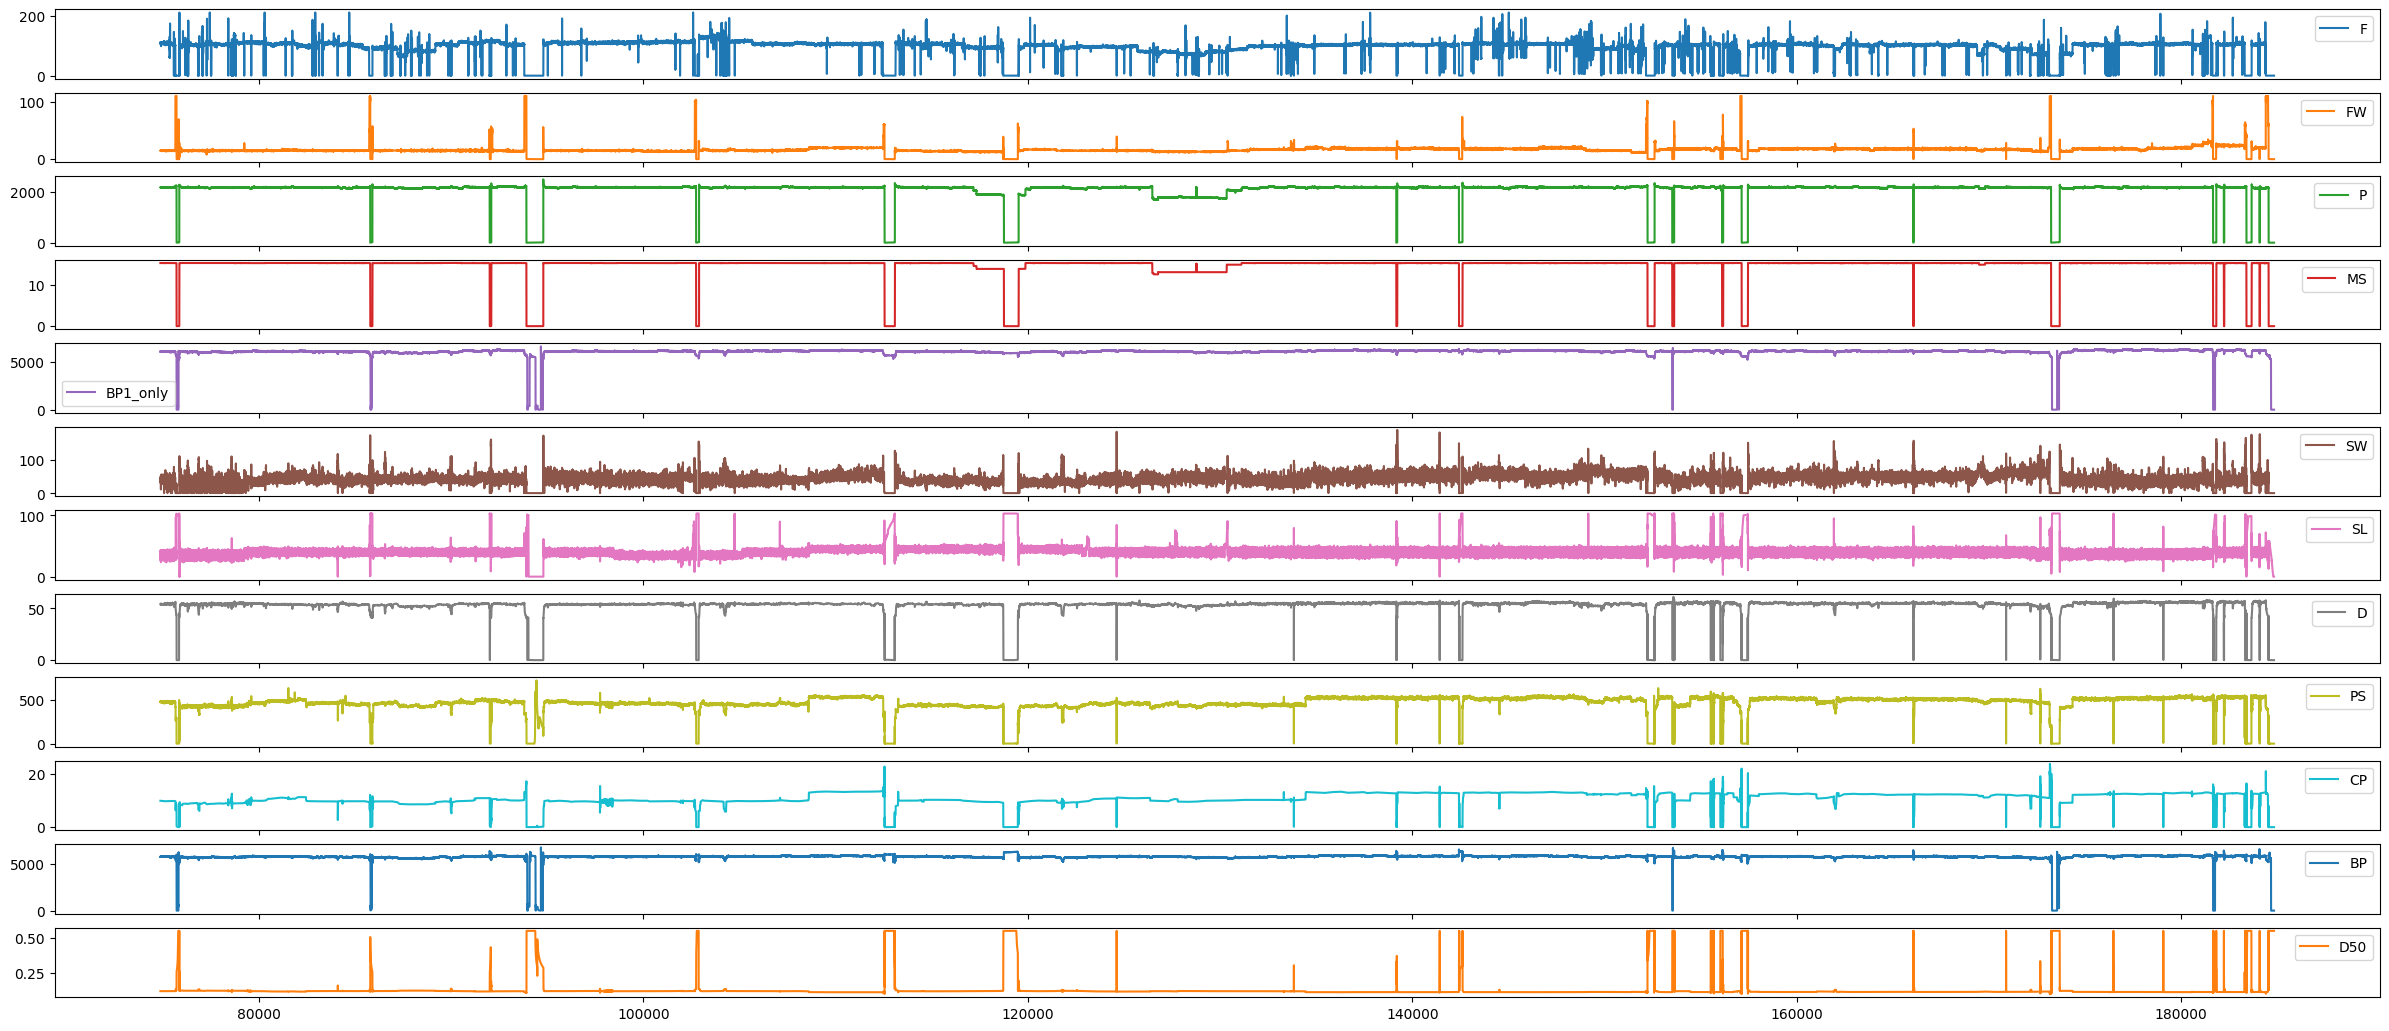

In [11]:
df2.plot(kind='line',subplots=True,layout=(14,1),figsize=(30,15))
plt.show()

In [135]:
#df=pd.read_excel('1_minute_mother_data.xlsx',header=0,index_col=0)
# # Data Filtering: For clipping data
# #df0 = df0[~(df0['Date'] < '2019-11-02')]
df0=df2.copy()
df6 = df0[#(df0['F'] >= 0 )& (df0['Feed'] < 1600) &
          (df0['FW'] >= 0.01 )&
          #(df0['SW'] >= 0.01 )&
         (df0['MS'] > 1) &
          #(df0['PS']>= 50)&
          #(df0['CP']>= 0.01)& #all
          (df0['P']> 1)&
         #(df0['BP']> 0)&
         (df0['D']> 15)&
         (df0['D50']< 0.7 )] #all
len(df6)
#

104737

In [120]:
df2['D50'].quantile(0.97)

0.5501361883246426

In [ ]:
# df3['P']=df3['P'].clip(2000)
# df3['BP']=df3['BP'].clip(5000)
# df3['PS']=df3['PS'].clip(200)
# df3['F']=df3['F'].clip(40)
# df3['CP']=df3['CP'].clip(6)
# df3['MS']=df3['MS'].clip(8)
# df3['CP']=df3['CP'].clip(6)
# df3['D']=df3['D'].clip(40)


min and maxes
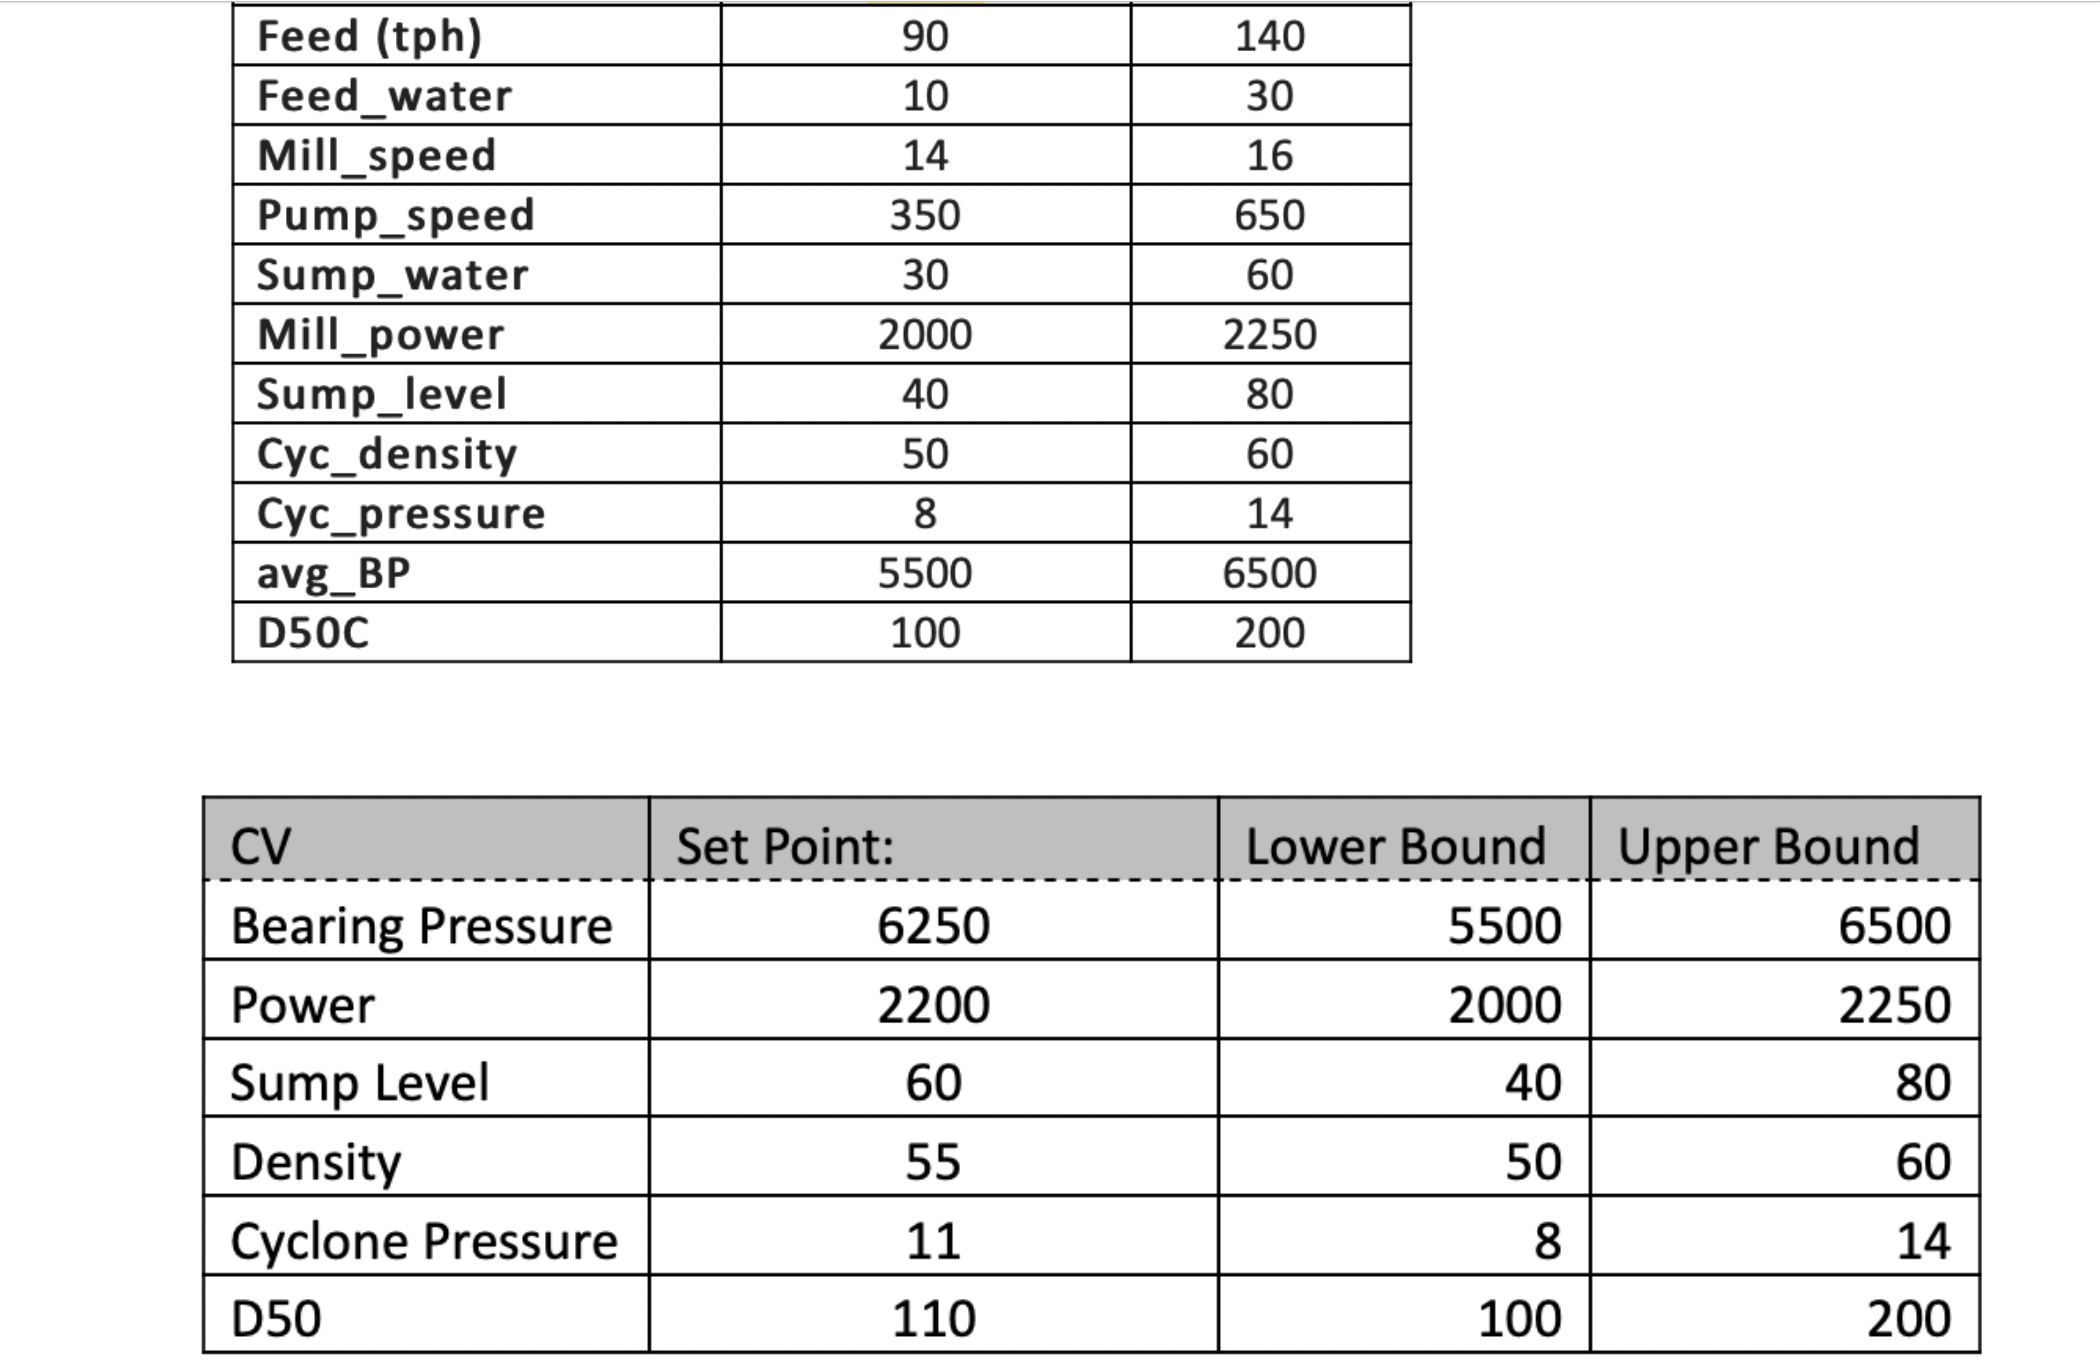

## Train Test Split

In [6]:
## Train Test Split

train = df2.copy()
test = df3.copy()
# Split into train and test subsets (30% for test)
#train, test = train_test_split(data, test_size=0.3, shuffle=False) #


In [413]:
#Min Max
train=(train-train.min())/(train.max())

In [ ]:
#Normal/ Min-max scaler:


# data = df_5.copy()
# # Split into train and test subsets (30% for test)
# test, train = train_test_split(data, test_size=0.3, shuffle=False)  #switched order so it could train on more recent data.

# s = StandardScaler()
# s_train = s.fit_transform(train)  #whole dataframe ppossilbe

# print("70% Training Split")
# # print('a: ', s.scale_)
# # print('Scaler mean')
# # print('b: ', s.mean_)
# # tr_std=s.scale_  # not valid for min max scale
# # tr_mean=s.mean_  #not valid for min max scale

# s_test = s.transform(test)


# # convert scaled values back to dataframe  
# #This is a scaled training and test dataset

# s_train_df = pd.DataFrame(s_train, columns=train.columns.values,index=train.index) #train index if partial
# s_test_df = pd.DataFrame(s_test, columns=test.columns.values,index=test.index)


# s_train_df=( s_train_df-s_train_df.min() ) /(s_train_df.max()-s_train_df.min())
# s_test_df =( s_test_df - s_test_df.min() ) /(s_test_df.max() -s_test_df.min ())

# #Standard scaler
# # s_train_df.plot(kind='kde',subplots=True,layout=(6,2),figsize=(10,6))
# # plt.show()


In [ ]:
# # Store training and testing data!
# s_train_df.to_excel('train70.xlsx',header=True,index=True)
# s_test_df.to_excel('test30.xlsx',header=True,index=True)

## Data Filtering

In [ ]:
#Could come back to

# %%capture

# # Data Filtering
# df0 = df0[~(df0['Date'] < '2019-11-02')]
# df = df0[(df0['Feed'] >= 0 )& (df0['Feed'] < 1600) &
#           (df0['Calc Ratio'] >= 0 )& (df0['Calc Ratio'] < 1) &
#           (df0['Disch_dens'] >= 0 )& (df0['Disch_dens'] < 2) &
#          (df0['Cyc_inlet'] < 10000) &
#           (df0['Load']>= 200)&
#           (df0['Cyc_Press']>= 0)&
#           (df0['Cyc_solid']< 10000)&
#           (df0['Cyc_water']< 10000)]
# df.dropna(inplace=True)

#df.reset_index(drop=True, inplace=True)

# train.columns = [ 'F', 'FW', 'MS', 'PS', 'SW', 'BP', 'P', 'SL', 'D', 'CP', 'D50']
# test.columns = [ 'F', 'FW', 'MS', 'PS', 'SW', 'BP', 'P', 'SL', 'D', 'CP', 'D50']

#s_train_df.columns = [ 'F', 'FW', 'MS', 'PS', 'SW', 'BP', 'P', 'SL', 'D', 'CP', 'D50']
#s_test_df.columns = [ 'F', 'FW', 'MS', 'PS', 'SW', 'BP', 'P', 'SL', 'D', 'CP', 'D50']
# df[['RW']] = df[['CW']].to_numpy() - df[['IW']].to_numpy() - df[['SL']].to_numpy()

In [ ]:
#mmtrain=(train-train.min())/train.max()

In [60]:
df3=[]
df3=df2.copy()
df3['P']=df3['P'].clip(2000)
df3['BP']=df3['BP'].clip(5000)
df3['PS']=df3['PS'].clip(200)
df3['F']=df3['F'].clip(40)
df3['CP']=df3['CP'].clip(6)
df3['MS']=df3['MS'].clip(8)
df3['CP']=df3['CP'].clip(6)
df3['D']=df3['D'].clip(40)


#train=df3.reset_index() #.copy()
#could drop instead of clip?

In [33]:
df2.head()

F         FW       P         MS     BP1_only         SW  \
74869  111.405846  14.598560  2169.0  15.145363  6044.774902  32.526264   
74870  107.870941  14.508869  2168.0  15.147894  6057.359375  45.687561   
74871  110.143867  14.419179  2173.0  15.150425  6057.979004  45.908504   
74872  105.617599  14.329488  2168.0  15.152955  6069.095215  46.717491   
74873  109.240334  14.420056  2166.0  15.155486  6034.547363  46.813690   

              SL          D          PS        CP           BP       D50  
74869  29.578226  53.903278  478.591248  9.961408  5743.959839  0.120459  
74870  27.115744  53.903572  474.075592  9.960505  5751.303589  0.120462  
74871  32.460133  53.903866  482.842499  9.959603  5761.903320  0.120464  
74872  32.833820  53.904160  484.021484  9.958701  5752.149414  0.120466  
74873  35.468651  53.904453  483.811951  9.957799  5727.687988  0.120469

In [40]:
V=[ 'F', 'FW', 'P', 'MS', 'BP1_only','SW','SL','D','PS','CP','BP','D50']
for i in range(len(V)):
    if i ==2:
        continue
    df3=df3.drop_duplicates(subset=V[i],keep='first')

#df3.reset_index(inplace=True)

In [ ]:
df3.plot(subplots=True)
plt.show()
# df3[['BP','P','MS']].plot(subplots=True)
# plt.show()

In [ ]:
df3.describe()

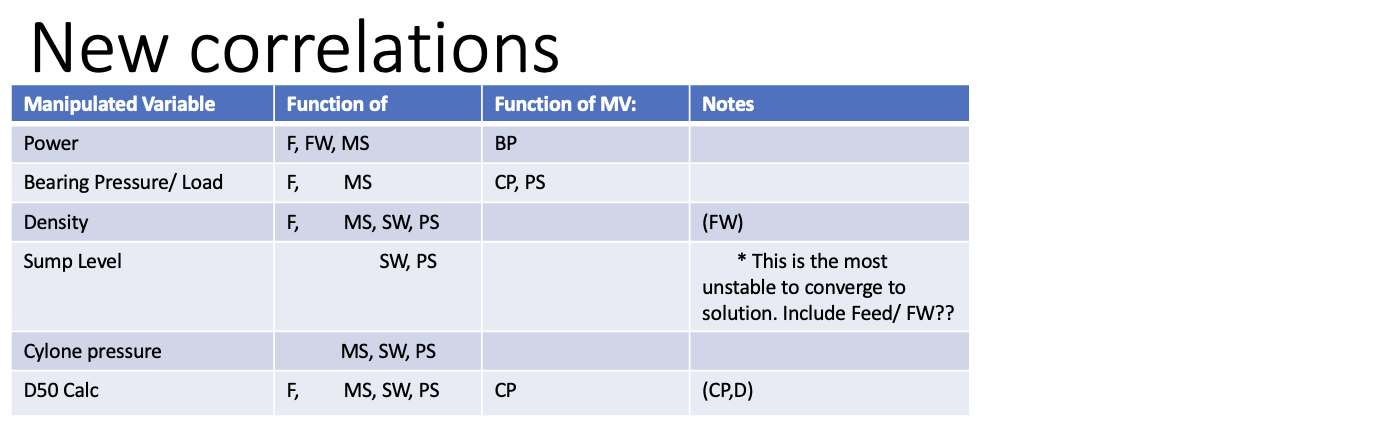

## Model Identification (ARX)

$$\large{y_{k+1} = \sum_{i=1}^{n_a} a_i y_{k-i+1} + \sum_{i=1}^{n_b} b_i u_{k-i-n_k+1}}$$

#### Now, With Gekko!


### MVs & CVs

In [47]:
MV = ['F', 'FW', 'MS', 'SW', 'PS']
CV = ['BP', 'P', 'SL', 'D', 'CP', 'D50']


In [ ]:
# #full ARX :
# from gekko import GEKKO
# t = train['index']
# u = train[MV]
# y = train[CV]

# # generate time-series model
# m = GEKKO()

# ##################################################################
# # system identification
# na = 2 # output coefficients
# nb = 2 # input coefficients
# print('Identify model')
# yp,p,K = m.sysid(t,u,y,na,nb,objf=10000,scale=True,diaglevel=1,pred='meas')

In [6]:
w=3       #max terms of arx
df= []
df= df3.copy()  #train.copy()


#### Mill Power (P)

In [7]:
#P_arx = Ident(mv=['F','FW','MS','BP'], cv=['P'])
P_arx = Ident(mv=['F','MS'], cv=['P'])
P_arx.identify(df, na=[1, w], nb=[1, w], nk=[0, w]) # try just function of MVs
                                                    # try nk >5 ? 6 maybe better.

In [30]:
from gekko import GEKKO
t = train['index']
u = train[['F','MS']]
y = train[['P']]

# generate time-series model
m = GEKKO()

##################################################################
# system identification
na = 4 # output coefficients
nb = 6 # input coefficients
print('Identify model')
yp,p2,K2 = m.sysid(t,u,y,na,nb,objf=1000,scale=True,diaglevel=1,pred='meas')


Identify model
---Final---
Gain
[[-1.16839548  0.42520592]]
alpha
[[0.46075826]
 [0.14397459]
 [0.15200928]
 [0.21775485]]
beta
[[[-2.24428772e-02  7.49312245e+00]
  [ 8.06706478e-03 -1.20776427e+00]
  [-5.66013823e-04 -3.29396621e+00]
  [-1.07974195e-02 -3.36426968e+00]
  [-1.38039699e-02  4.10968749e-01]
  [ 2.12619306e-03  2.69786685e-01]]]
gamma
[54.50233134]


#### Sump Level (SL)

In [8]:
SL_arx = Ident(mv=['PS','SW'], cv=['SL'])
SL_arx.identify(df, na=[1, w], nb=[1, w], nk=[0, w])

In [34]:
from gekko import GEKKO
t = train['index']
u = train[['F','FW','MS','SW','PS']]
y = train[['SL']]

# generate time-series model
m = GEKKO()

##################################################################
# system identification
na = 1 # output coefficients
nb = 3 # input coefficients
print('Identify model')
yp,p2,K2 = m.sysid(t,u,y,na,nb,objf=1000,scale=True,diaglevel=1,pred='meas')


Identify model
---Final---
Gain
[[ 0.35523511 -0.18289915  0.27271645  0.8923051  -0.79723173]]
alpha
[[0.91851052]]
beta
[[[ 0.00796671  0.0357031  -1.37392302  0.17767163 -0.0356341 ]
  [ 0.02718657  0.02760239  1.29744167 -0.08937404  0.00960745]
  [-0.01678023 -0.07725668  0.39539731 -0.05198804  0.00964781]]]
gamma
[3.37632753]


#### Density (D)

In [9]:
D_arx = Ident(mv=['F', 'MS', 'PS', 'SW'], cv=['D'])
D_arx.identify(df, na=[1, w], nb=[1, w], nk=[0, w])

In [39]:
from gekko import GEKKO
t = train['index']
u = train[['F','FW','MS','SW','PS']]
y = train[['D']]

# generate time-series model
m = GEKKO()

##################################################################
# system identification
na = 3 # output coefficients
nb = 3 # input coefficients
print('Identify model')
yp,p2,K2 = m.sysid(t,u,y,na,nb,objf=1000,scale=True,diaglevel=1,pred='meas')


Identify model
---Final---
Gain
[[ 0.63852428 -0.22163317  0.88911605 -0.45220211 -0.29284183]]
alpha
[[0.70432978]
 [0.1348048 ]
 [0.08648315]]
beta
[[[ 0.00226924  0.00934452  0.30919208 -0.01156341  0.00180213]
  [ 0.0016318   0.00286367 -0.03049575  0.00355285 -0.00233117]
  [ 0.00202707 -0.01524285 -0.09205948  0.00470752 -0.00055091]]]
gamma
[1.43906852]


#### Bearing Pressure (BP)

In [10]:
#BP_arx = Ident(mv=['F','MS','CP','PS'], cv=['BP'])
BP_arx = Ident(mv=['F','MS','PS'], cv=['BP'])
BP_arx.identify(df, na=[1, w], nb=[1, w], nk=[0, w])

In [44]:
from gekko import GEKKO
t = train['index']
u = train[['F','MS']]
y = train[['BP']]

# generate time-series model
m = GEKKO()

##################################################################
# system identification
na = 3
# output coefficients
nb = 3 # input coefficients
print('Identify model')
yp,p2,K2 = m.sysid(t,u,y,na,nb,objf=10000,scale=True,diaglevel=1,pred='meas')


Identify model
---Final---
Gain
[[ 0.25084216 -0.06469788]]
alpha
[[0.94481907]]
beta
[[[ 0.07442157  3.57834148]
  [ 0.05264586 -3.86850035]
  [ 0.02853609 -0.61726152]]]
gamma
[331.15050582]


#### Cyclone Pressure (CP)

In [11]:
CP_arx = Ident(mv=['MS','SW','PS'], cv=['CP'])
CP_arx.identify(df, na=[1, w], nb=[1, w], nk=[0, w])

In [46]:
from gekko import GEKKO
t = train['index']
u = train[['F','FW','MS','PS']]
y = train[['CP']]

# generate time-series model
m = GEKKO()

##################################################################
# system identification
na = 3 # output coefficients
nb = 3 # input coefficients
print('Identify model')
yp,p2,K2 = m.sysid(t,u,y,na,nb,objf=1000,scale=True,diaglevel=1,pred='meas')


Identify model
---Final---
Gain
[[-1.02555384  0.14724872 -4.97882228  7.58437963]]
alpha
[[0.78021601]
 [0.12154281]
 [0.10766508]]
beta
[[[ 7.22165223e-04  6.45219286e-03  5.22458645e-02 -3.54164184e-04]
  [-2.98562950e-05 -2.48249056e-04  3.95016399e-02 -9.54290409e-04]
  [-8.04649301e-05 -6.33350294e-03 -2.45878499e-02 -4.88907291e-04]]]
gamma
[-0.24929129]


#### D50 Calc (D50)

In [12]:
#D50_arx = Ident(mv=['F','MS','SW','PS','CP'], cv=['D50'])
D50_arx = Ident(mv=['F','MS','SW','PS'], cv=['D50'])
D50_arx.identify(df, na=[1, w], nb=[1, w], nk=[0, w])

In [50]:
from gekko import GEKKO
t = train['index']
u = train[['F','FW','MS','SW','PS']]
y = train[['D50']]

# generate time-series model
m = GEKKO()

##################################################################
# system identification
na = 4 # output coefficients
nb = 5 # input coefficients
print('Identify model')
yp,p2,K2 = m.sysid(t,u,y,na,nb,objf=1000,scale=True,diaglevel=1,pred='meas')


Identify model
---Final---
Gain
[[ 0.01174954 -0.09049153 -0.32653751 -0.0705776   0.11864634]]
alpha
[[ 6.58690192e-01]
 [ 1.10999145e-01]
 [ 1.49544640e-01]
 [-2.45302684e-04]]
beta
[[[ 2.54614980e-05 -1.89122380e-04 -8.64296483e-03  1.92732435e-04
   -5.41140513e-05]
  [ 1.26911836e-05 -1.89219212e-04  4.11130447e-03 -8.29668867e-05
    1.15041186e-04]
  [ 2.11910082e-05  2.98300316e-04 -2.57383068e-03 -1.22814044e-04
   -1.35491582e-05]
  [ 1.72861829e-05 -2.31597932e-04 -4.41439272e-03  4.11272066e-06
    3.08047161e-06]
  [-7.07708649e-05  2.45089609e-04  7.83828941e-03 -1.87535453e-05
   -2.69572043e-05]]]
gamma
[0.05473616]


### Create Models Dictionary

##### models = {'BP': BP_arx,'P': P_arx, 'SL': SL_arx, 'D': D_arx,  'CP': CP_arx, 'D50': D50_arx }

### Combine parameter arrays and save:

In [ ]:
# for i in enumerate([K1,K2,K3,K4,K5,K6]):
    
KK= np.concatenate(([K1,K2,K3,K4,K5,K6]))

# for j in enumerate([p1,p2,p3,p4,p5,p6]):
KK

#p...

In [ ]:
print(KK):

In [ ]:
#p = {'a':A,'b':B,'c':C} #run to save
with open('p_gek_3er.pkl', 'wb') as file:
    pickle.dump(p, file)

In [51]:
from gekko import GEKKO
t = train['index']
u = train[['F','FW','MS','SW','PS']]
y = train[['D50']]

# generate time-series model
m = GEKKO()

##################################################################
# system identification
na = 2 # output coefficients
nb = 2 # input coefficients
print('Identify model')
yp,p,K = m.sysid(t,u,y,na,nb,objf=1000,scale=True,diaglevel=1,pred='meas')


Identify model
---Final---
Gain
[[ 0.00924043 -0.11865739 -0.33513098 -0.02409346  0.11730384]]
alpha
[[0.73114779]
 [0.16219971]]
beta
[[[ 1.83927579e-05 -2.10349285e-04 -8.92240021e-03  1.81592187e-04
   -8.33642147e-06]
  [-1.23265031e-05  9.54657890e-05  3.94797657e-03 -1.94036470e-04
    3.89260391e-05]]]
gamma
[0.07356903]


In [63]:
#p = {'a':A,'b':B,'c':C} #run to save
with open('p_gek_5_4_clip.pkl', 'wb') as file:
    pickle.dump(p, file)

In [121]:
train=df6.reset_index()
train.describe()

index              F             FW              P  \
count  104743.000000  104743.000000  104743.000000  104743.000000   
mean   129643.941714      99.815803      17.123099    2143.474514   
std     31617.465097      18.813984       7.512250      86.372798   
min     74869.000000       0.010000       0.023621       0.010000   
25%    102279.500000      98.233055      14.772533    2151.000000   
50%    129963.000000     104.377472      15.913883    2163.000000   
75%    157032.500000     107.624004      18.044444    2174.000000   
max    184544.000000     212.490860     110.265236    2478.000000   

                  MS       BP1_only             SW             SL  \
count  104743.000000  104743.000000  104743.000000  104743.000000   
mean       15.036889    6069.865655      46.073969      40.017988   
std         0.455927      87.275920      13.347146       5.223818   
min         1.741655    5214.786621       0.379076       0.010000   
25%        15.134733    6025.343994      37.813353      36.563192   
50%        15.144966    6076.891602      44.897831      40.077705   
75%        15.158776    6126.436523      53.848860      43.365263   
max        15.185266    6322.458008     190.012161     103.150269   

                   D             PS             CP             BP  \
count  104743.000000  104743.000000  104743.000000  104743.000000   
mean       54.040930     481.154232      11.170380    5746.626030   
std         1.585623      43.670075       1.577290      85.194536   
min        20.013042       3.404270       0.010000    4857.007690   
25%        53.627981     448.960159       9.838696    5707.671082   
50%        54.224354     480.675964      10.928766    5755.045166   
75%        54.843990     519.629974      12.654072    5800.272583   
max        59.377384     637.757202      23.897585    6561.703125   

                 D50  
count  104743.000000  
mean        0.117824  
std         0.004975  
min         0.099365  
25%         0.114282  
50%         0.118028  
75%         0.120788  
max         0.550136

# FULL ARX without exceptions

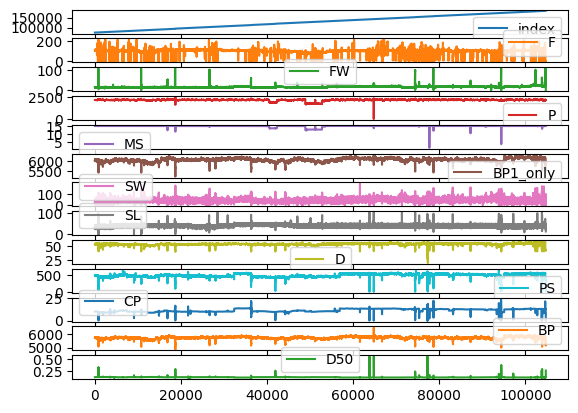

In [136]:
train=df6.reset_index()
train.plot(subplots=True)
plt.show()

In [137]:
from gekko import GEKKO
train=df6.reset_index()
train.plot(subplots=True)
plt.show()
t = train['index']
u = train[['F','FW','MS','SL','CP']]   #DIFFERENT, NEW NEW
y = train[['BP','P','D','D50']]

# generate time-series model
m = GEKKO()

##################################################################
# system identification
na = 2 # output coefficients
nb = 4 # input coefficients
print('Identify model')
yp,p,K = m.sysid(t,u,y,na,nb,objf=10000,scale=True,diaglevel=1,pred='meas')#,shift='none')


Identify model
---Final---
Gain
[[ 4.46339708e-01 -1.22723543e-01 -2.45870762e-01 -2.30572678e-02
   3.54016748e-01]
 [-1.21397534e-02  2.17350005e-02  9.80551035e-01  6.73452607e-03
   5.81256249e-03]
 [ 4.79659372e-01 -7.52591897e-02 -1.40977981e-01  2.67265600e-01
   1.71297487e-01]
 [-2.87931585e-03  2.76368908e-03  1.91358075e-03 -8.51272806e-04
  -5.68542715e-02]]
alpha
[[0.78769112 0.51589105 0.76237266 0.09526768]
 [0.14596316 0.39288085 0.18718738 0.08760737]]
beta
[[[ 9.98116861e-02  3.24560052e-02  1.00532839e+00  6.26621387e-02
    1.66080045e+00]
  [ 7.83314605e-02 -7.04716346e-02 -2.20845841e+00 -1.00267955e-01
   -1.26915587e+00]
  [ 1.91960465e-02 -1.32119843e-01 -7.03886039e-01  6.64104881e-02
    1.18590581e-01]
  [ 3.44682203e-02  4.72886496e-02 -1.11222685e-01 -5.34742202e-02
    1.12519942e+00]]

 [[-1.91894530e-02  4.83874697e-01  2.80772223e+00 -4.26214208e-02
   -3.52770223e-01]
  [ 6.34705629e-03 -4.83473676e-01  5.13599571e+00 -3.22134883e-03
    1.91555094e-0

#5_4 care
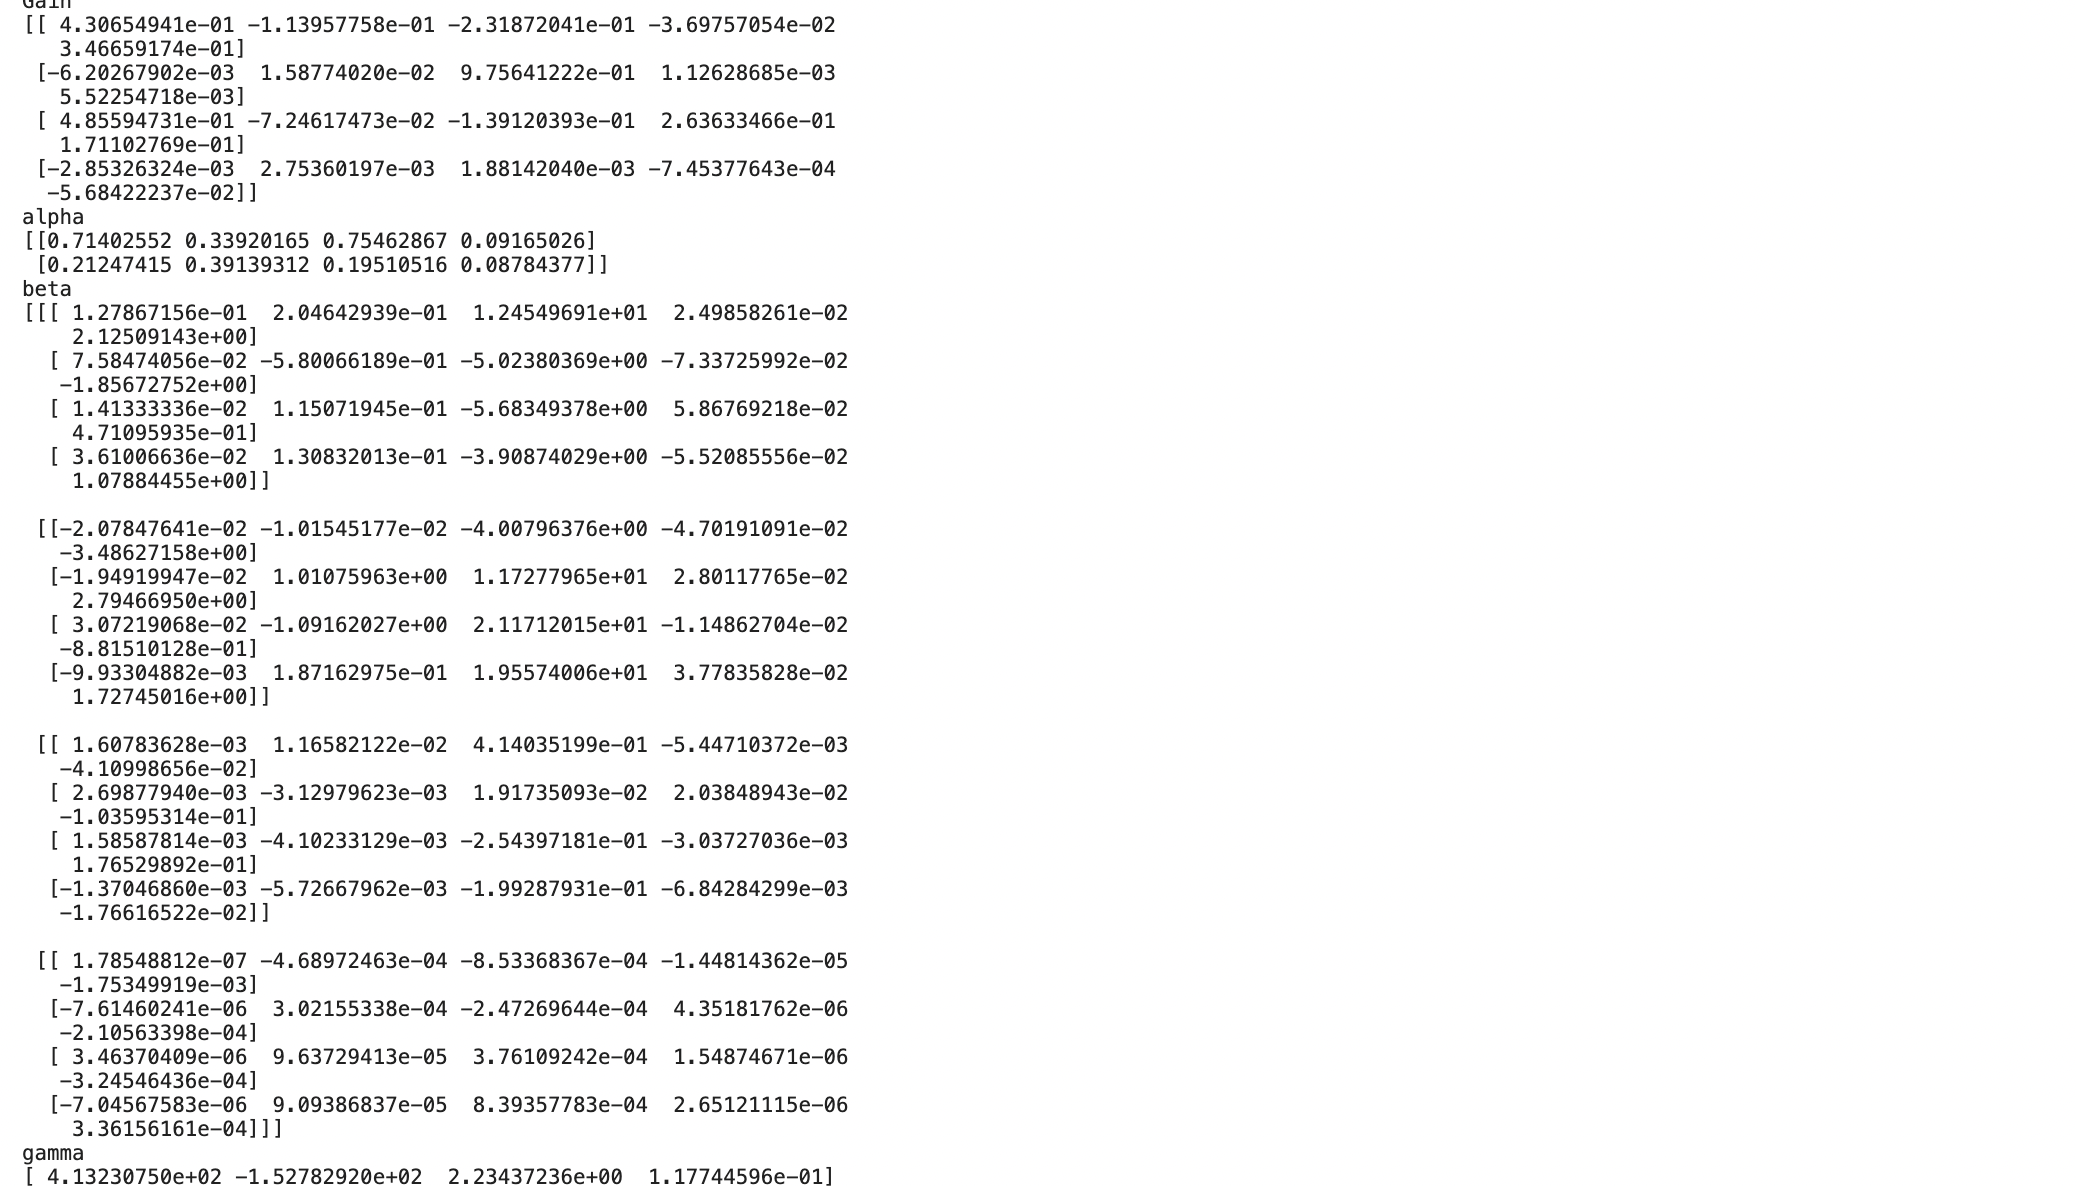
#one that looked good 5_4 _filt
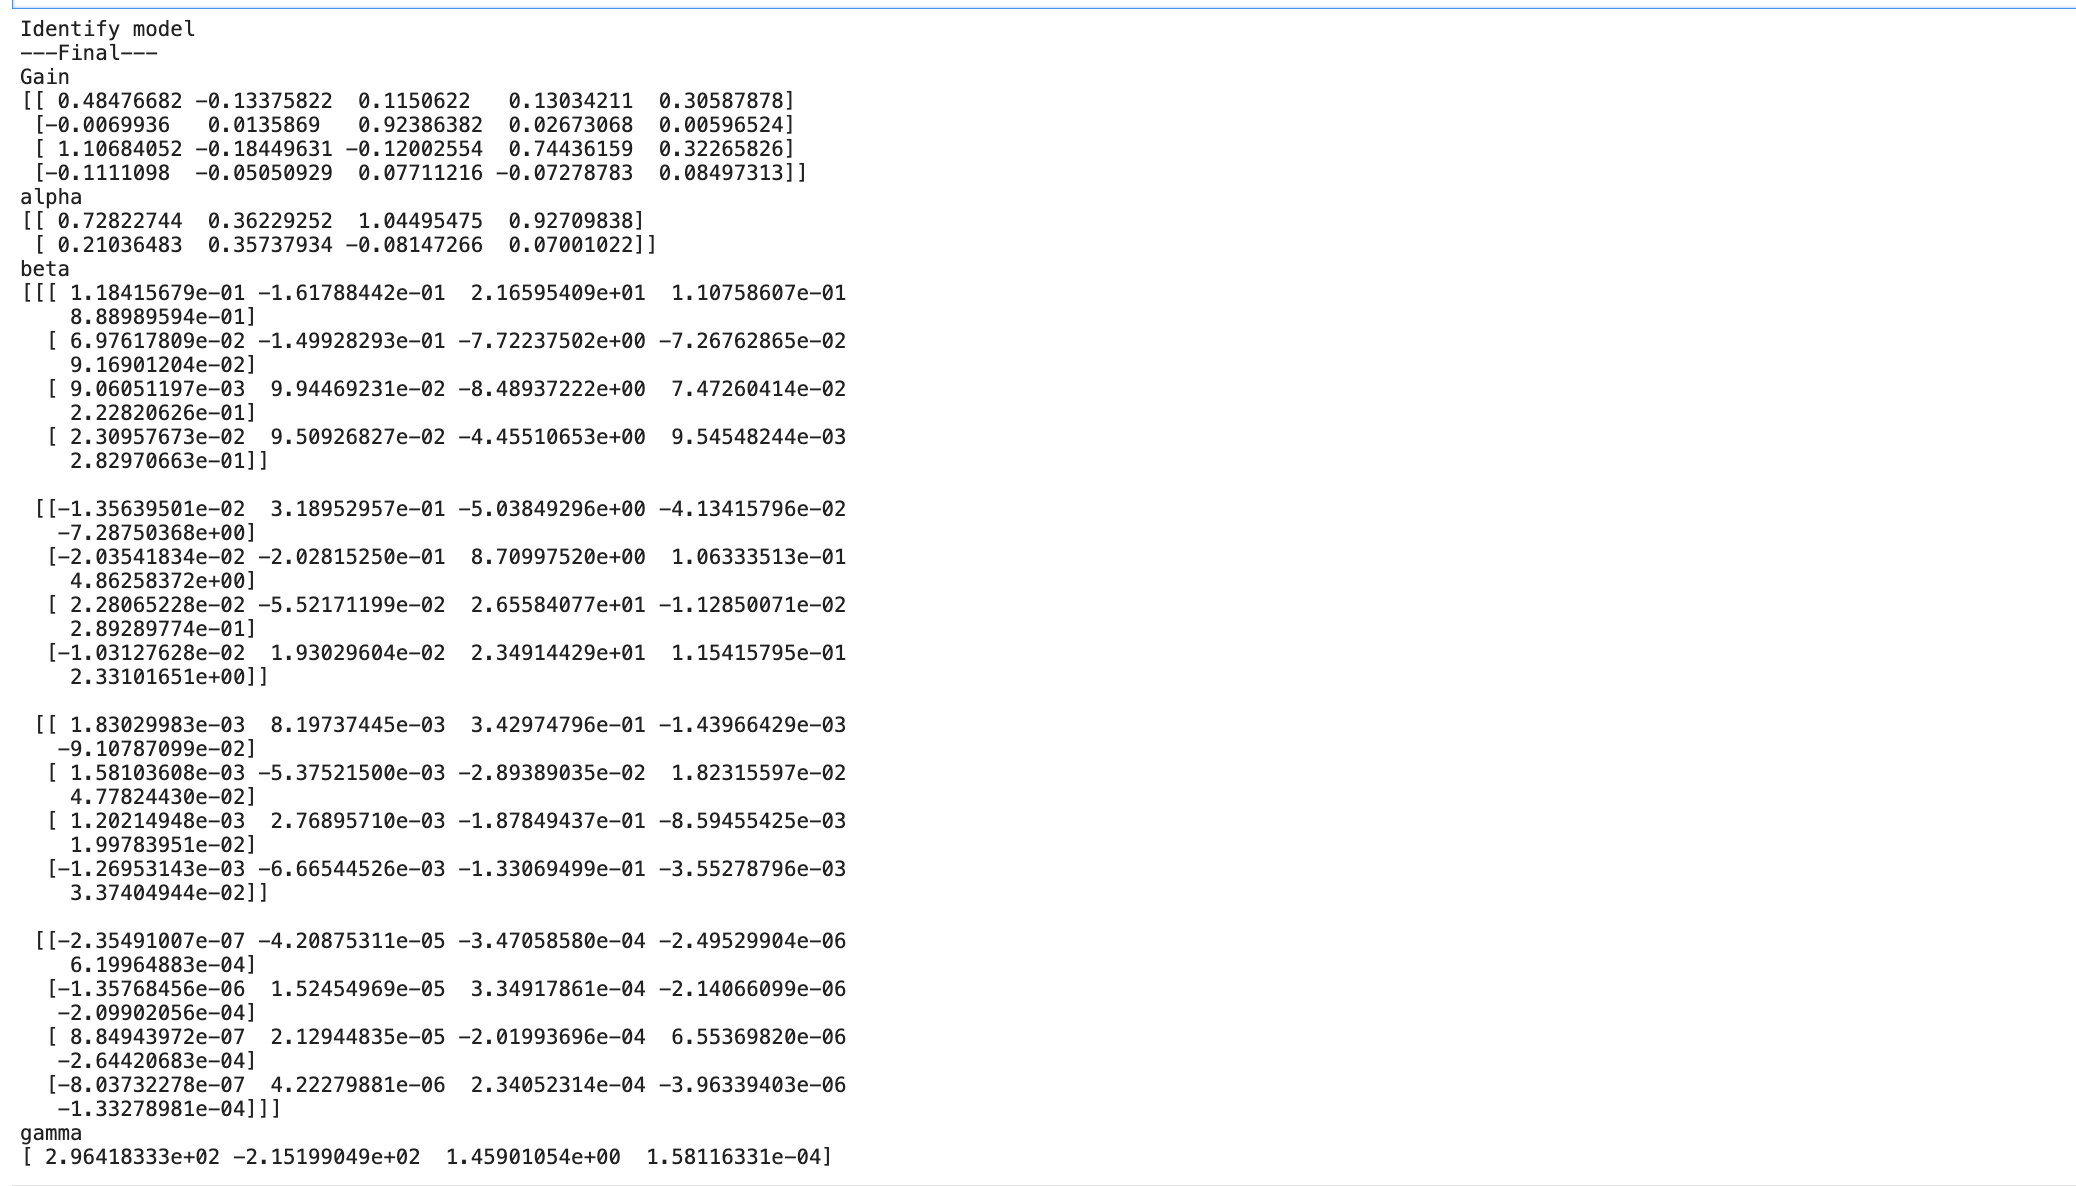

In [ ]:
# Replace values below 0.001 with 0
threshold = 0.0001
for i in ['a','b','c']:
    p[i][np.abs(p[i]) < threshold] = 0

print(p)


In [138]:
#p = {'a':A,'b':B,'c':C} #run to save
with open('p_gek_5_4_03.pkl', 'wb') as file:
    pickle.dump(p, file)

In [ ]:
# DIY ARX  create and plot for one variable
 
# Could try scaling differently so coefficients are reasonable
# Try different variable.

import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt
%matplotlib inline

na = 2 # Number of A coefficients
nb = 2 # Number of B coefficients
ny = 1 # Number of outputs
nu = 3 # Number of inputs

# A (na x ny)

#CV
cv= 'CP'
#MVs
mv=['SW','MS','PS']

#my own a and b array
# if na==2:
#     A=np.array([[models[cv].alpha[cv][0]],[models[cv].alpha[cv][1]]])
# elif na==1:
#     A=np.array([[models[cv].alpha[cv][0]]])
# else:
#     print('add row to A matrix')
# #A = np.array([models['P'].alpha['P']])   


# # B (ny x (nb x nu))
# B=np.array([])
# b1=models[cv].beta[mv[0]][0]
# b2=models[cv].beta[mv[1]][0]
# b3=models[cv].beta[mv[2]][0]
# b4=models[cv].beta[mv[0]][1]
# b5=models[cv].beta[mv[1]][1]
# b6=models[cv].beta[mv[2]][1]
# B=np.array([[[b1,b2,b3],[b4,b5,b6]]])

# # for i in range(nb):
# #     L=[]
# #     for j in range(nu):
# #         L+=models[cv].beta[mv[j]][1]
# #         print(L)
# #     np.append(B,L,axis=0)
# print(B)

#C = np.array([0.0])

# create parameter dictionary
p = {'a':A,'b':B,'c':C}
#print(p)

# Create GEKKO model
m = GEKKO(remote=False)

y = m.Array(m.CV,1)
u = m.Array(m.MV,3)

y[0].value=df[cv].iloc[0]
#y[3].value=0.0 D



# Build GEKKO ARX model
y,u = m.arx(p,y,u)

# load inputs
tf = 120 # final time
u1 = np.zeros(tf+1)
u2 = u1.copy()
u3 = u2.copy()

# u1[30:60] = df_5[m1].median()
# u2[30:60] = df_5[m2].median()
# u3[30:60] = df_5[m3].median()

u1[-1] = df[mv[0]].iloc[tf]
u2[-1] = df[mv[1]].iloc[tf]
u3[-1] = df[mv[2]].iloc[tf]

u1[:-1] = df[mv[0]].iloc[:tf]
u2[:-1] = df[mv[1]].iloc[:tf]
u3[:-1] = df[mv[2]].iloc[:tf]

u[0].value = u1
u[1].value = u2
u[2].value = u3

# customize names
mv1 = u[0]; mv2 = u[1]; mv3 = u[2]
cv1 = y[0]; #cv2 = y[1]


# options
m.time = np.linspace(0,tf,tf+1)
m.options.imode = 4; m.options.nodes = 2

# simulate
m.solve(disp=False)


plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(m.time,mv1.value,'r-',label=r'$MV_1$')
plt.plot(m.time,mv2.value,'b--',label=r'$MV_2$')
plt.plot(m.time,mv3.value,'y--',label=r'$MV_3$')
plt.ylabel('MV')
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(m.time,cv1.value,'r:',label=r'$CV_1$')
#plt.plot(m.time,cv2.value,'b.-',label=r'$CV_2$')
plt.ylabel('CV'); plt.xlabel('Time (x2 min)')
plt.legend(loc='best')
plt.show()

In [446]:
int(np.around(df2[cv].max()))*0.6

14.399999999999999

## Create arrays for ARX

In [319]:
#B=np.array([B])
#display(A,B,C)

array([[ 1.02453897,  0.98517056,  0.5105138 ,  0.67819536,  0.71033351,
         0.60359317],
       [-0.04897976,  0.        ,  0.22666676,  0.24427325,  0.14535414,
         0.0476174 ]])

array([[[[ 2.13680048e-01,  0.00000000e+00, -2.76780157e+01,
           1.29575337e-01,  0.00000000e+00],
         [ 1.12803081e-01, -1.44755825e-01,  1.10663124e+02,
           0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -3.51338619e-02,  1.51832893e-01],
         [ 4.53135352e-03,  0.00000000e+00,  4.17632552e-01,
          -1.30229641e-03, -3.69656054e-03],
         [ 0.00000000e+00,  0.00000000e+00, -1.34322273e-03,
           1.96463228e-02, -4.45355041e-04],
         [-5.63785436e-06,  0.00000000e+00, -3.16995093e-04,
          -1.30602516e-04,  1.31358642e-05]],

        [[ 8.73331000e-03,  0.00000000e+00,  2.68288832e+01,
          -1.46256707e-01,  0.00000000e+00],
         [-1.08528507e-01,  1.86750843e-01, -1.08954311e+02,
           0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           1.26345473e-02, -1.04559119e-01],
         [ 1.00721037e-03,  0.00000000e+00, 

array([0., 0., 0., 0., 0., 0.])

In [24]:
A=np.zeros((3,len(models))) # (na x ny) (2 or 3 x 6)
for i, tag in enumerate(models):
    cv=tag
    na=models[tag].na_best
    nb=models[tag].nb_best
    if na==1:
        A[0][i]= models[cv].alpha[cv][0]
    elif na==2:
        A[0][i]= models[cv].alpha[cv][0]
        A[1][i]= models[cv].alpha[cv][1]
    elif na==3:
        A[0][i]= models[cv].alpha[cv][0]
        A[1][i]= models[cv].alpha[cv][1]
        A[2][i]= models[cv].alpha[cv][2]
    else:
        raise error

        #ny x (nb x nu)   2 x (1 x 3) ... 6 x(3x5)  set it here
B=np.zeros((6,3,5)) # 3 rows of beta coef, 6 columns of ARX CV out, stacks of 5 inputs
for i, tag in enumerate(models):
    for j in range(len(B[0])):
        for k, jag in enumerate(MV):
            try:
                B[i][j][k]= models[tag].beta[jag][j]
            except:
                pass

C=np.zeros(len(models))

In [25]:
p = {'a':A,'b':B,'c':C} #run to save
with open('p_hm_1.pkl', 'wb') as file:
    pickle.dump(p, file)

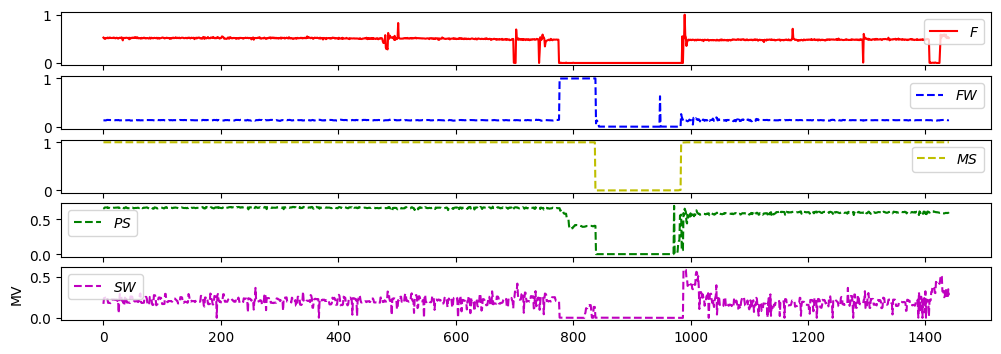

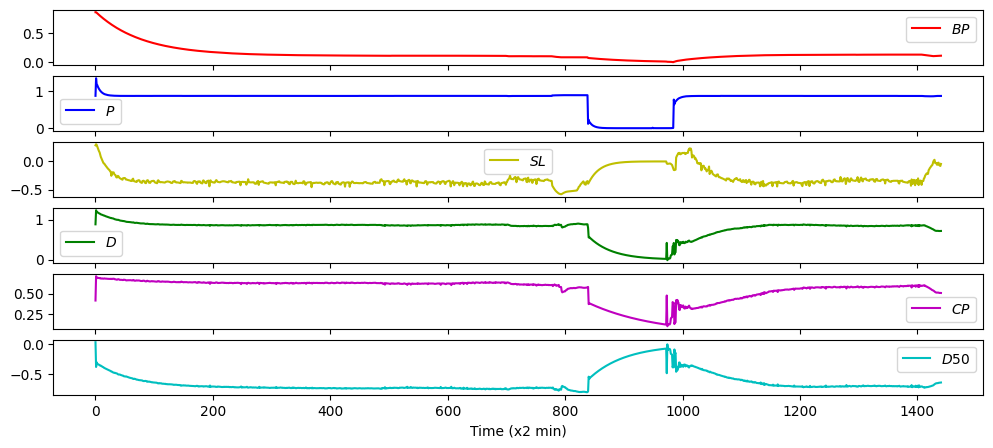

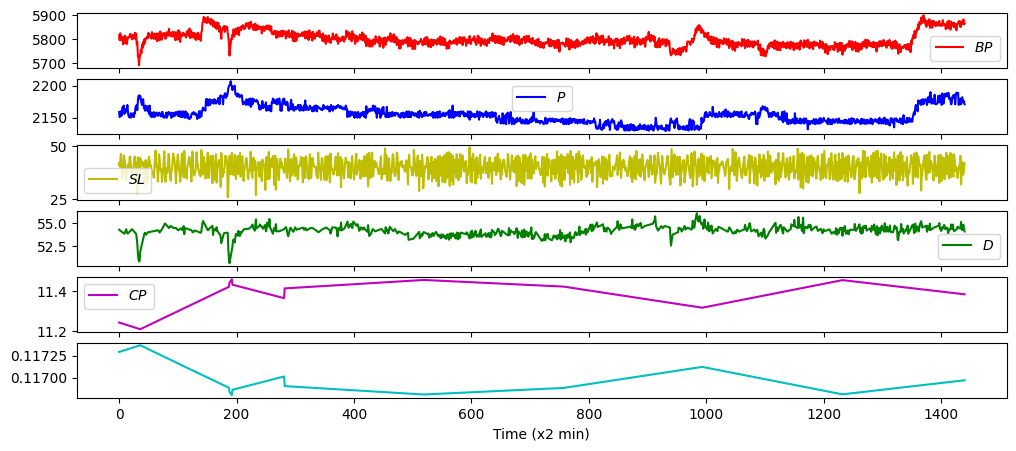

In [465]:
# DIY FULL ARX
 
# Could try scaling differently so coefficients are reasonable
# Try different variable.

import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt
%matplotlib inline

na = 2 # Number of A coefficients
nb = 2 # Number of B coefficients
ny = 6 # Number of outputs
nu = 5 # Number of inputs


# A (na x ny)
# B (ny x (nb x nu))
# C (ny)
# create parameter dictionary
p = {'a':A,'b':B,'c':C}

# Create GEKKO model
m = GEKKO(remote=False)

# Build GEKKO ARX model

y = m.Array(m.CV,6)
u = m.Array(m.MV,5)

for i in range(len(y)):
    y[i].value=df[CV[i]].iloc[0]
#y[3].value=0.0 D

y,u = m.arx(p,y,u)

# # rename CVs
# TC1 = y[0]
# TC2 = y[1]

# # rename MVs
# Q1 = u[0]
# Q2 = u[1]


# load inputs
tf = 1440 # final time
u1 = np.zeros(tf+1)
u2 = u1.copy()
u3 = u2.copy()
u4 = u3.copy()
u5 = u4.copy()

# u1[:] = df_5[MV[0]].median()
# u2[:] = df_5[MV[1]].median()
# u3[:] = df_5[MV[2]].median()
# u4[:] = df_5[MV[3]].median()
# u5[:] = df_5[MV[4]].median()

u1[0:] = df[MV[0]].iloc[0:tf+1]
u2[0:] = df[MV[1]].iloc[0:tf+1]
u3[0:] = df[MV[2]].iloc[0:tf+1]
u4[0:] = df[MV[3]].iloc[0:tf+1]
u5[0:] = df[MV[4]].iloc[0:tf+1]

u[0].value = u1
u[1].value = u2
u[2].value = u3
u[3].value = u4
u[4].value = u5

# customize names
mv1 = u[0]; mv2 = u[1]; mv3 = u[2]; mv4 = u[3]; mv5 = u[4]
cv1 = y[0]; cv2 = y[1]; cv3 = y[2]; cv4 = y[3]; cv5 = y[4]; cv6 = y[5]


# options
m.time = np.linspace(0,tf,tf+1)
m.options.imode = 4; m.options.nodes = 2

# simulate
m.solve(disp=False)
#m.time=m.time[20:]
plt.figure(0,figsize=(12,4))
plt.subplot(5,1,1)
plt.plot(m.time,mv1.value,'r-',label=r'$F$');plt.legend(loc='best')
plt.subplot(5,1,2)
plt.plot(m.time,mv2.value,'b--',label=r'$FW$');plt.legend(loc='best')
plt.subplot(5,1,3)
plt.plot(m.time,mv3.value,'y--',label=r'$MS$');plt.legend(loc='best')
plt.subplot(5,1,4)
plt.plot(m.time,mv4.value,'g--',label=r'$PS$');plt.legend(loc='best')
plt.subplot(5,1,5)
plt.plot(m.time,mv5.value,'m--',label=r'$SW$');plt.legend(loc='best')
plt.ylabel('MV')
plt.legend(loc='best')
plt.figure(1,figsize=(12,5))
plt.subplot(6,1,1)
plt.plot(m.time,cv1.value,'r-',label=r'$BP$');plt.legend(loc='best')
plt.subplot(6,1,2)
plt.plot(m.time,cv2.value,'b-',label=r'$P$');plt.legend(loc='best')
plt.subplot(6,1,3)
plt.plot(m.time,cv3.value,'y-',label=r'$SL$');plt.legend(loc='best')
plt.subplot(6,1,4)
plt.plot(m.time,cv4.value,'g-',label=r'$D$');plt.legend(loc='best')
plt.subplot(6,1,5)
plt.plot(m.time,cv5.value,'m-',label=r'$CP$');plt.legend(loc='best')
plt.subplot(6,1,6)
plt.plot(m.time,cv6.value,'c-',label=r'$D50$'); plt.xlabel('Time (x2 min)');
plt.legend(loc='best')
plt.show();
plt.figure(2,figsize=(12,5))
plt.subplot(6,1,1)
plt.plot(m.time,df_5[CV[0]].iloc[:tf+1],'r-',label=r'$BP$');plt.legend(loc='best')
plt.subplot(6,1,2)
plt.plot(m.time,df_5[CV[1]].iloc[:tf+1],'b-',label=r'$P$');plt.legend(loc='best')
plt.subplot(6,1,3)
plt.plot(m.time,df_5[CV[2]].iloc[:tf+1],'y-',label=r'$SL$');plt.legend(loc='best')
plt.subplot(6,1,4)
plt.plot(m.time,df_5[CV[3]].iloc[:tf+1],'g-',label=r'$D$');plt.legend(loc='best')
plt.subplot(6,1,5)
plt.plot(m.time,df_5[CV[4]].iloc[:tf+1],'m-',label=r'$CP$');plt.legend(loc='best')
plt.subplot(6,1,6)
plt.plot(m.time,df_5[CV[5]].iloc[:tf+1],'c-',label=r'$D50$'); plt.xlabel('Time (x2 min)');

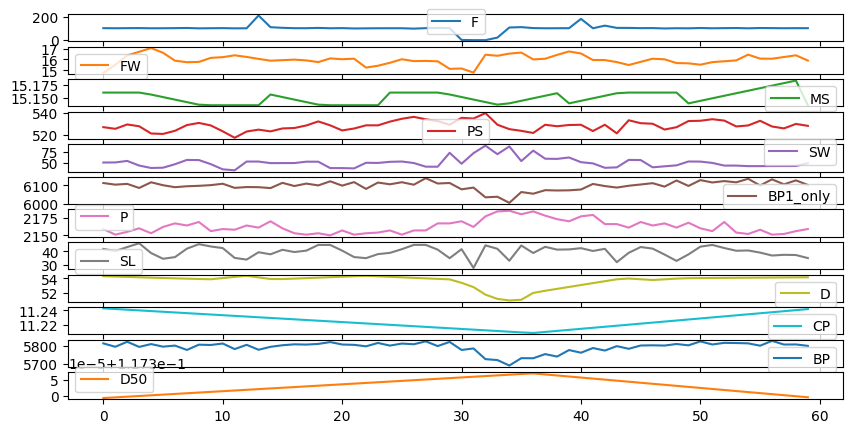

In [360]:
df_5.iloc[0:60].plot(subplots=True,figsize=(10,5))
plt.show()

In [ ]:
MV = ['F', 'FW', 'MS', 'PS', 'SW']
CV = ['BP', 'P', 'SL', 'D', 'CP', 'D50']

In [466]:
with open('p_p_p.pkl', 'wb') as file:
    pickle.dump(p, file)

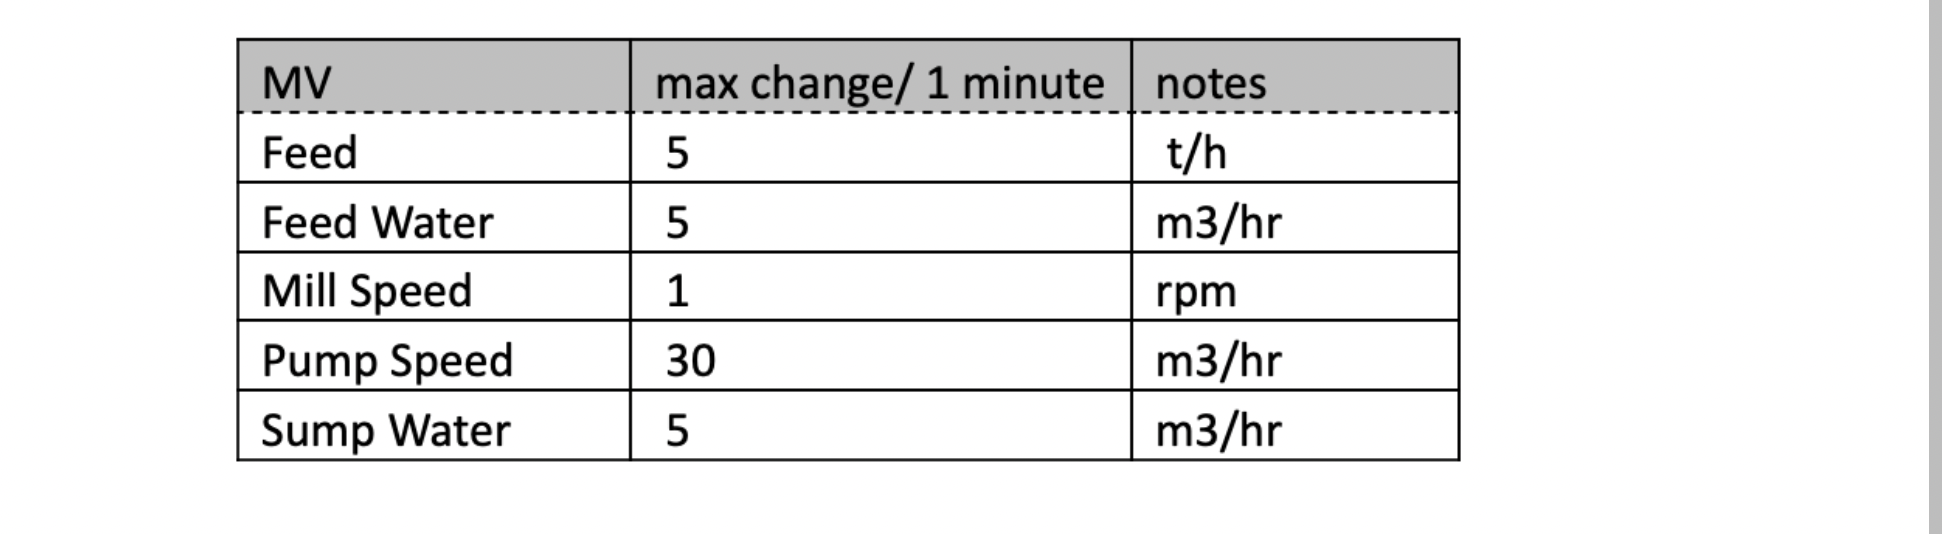

In [189]:
{'a': array([[0.71033351],
       [0.14535414]]), 'b': array([[[-0.00044536,  0.00019829],
        [-0.00134322, -0.00562536],
        [ 0.01964632, -0.01630459]]]), 'c': array([0.])}

{'a': array([[0.71033351],
        [0.14535414]]),
 'b': array([[[-0.00044536,  0.00019829],
         [-0.00134322, -0.00562536],
         [ 0.01964632, -0.01630459]]]),
 'c': array([0.])}

In [41]:
# from gekko import GEKKO 
# m=GEKKO(remote=False)

# # create control ARX model
# y = m.Array(m.CV,1)
# u = m.Array(m.MV,3)
# m.arx(p,y,u)

# # rename CVs
# TC1 = y[0]   #TC1 is power

# # rename MVs
# Q1 = u[0]   #Q1 is Feed
# Q3 = u[2]   #Q3 is Feed water   #may need to add down lower
# Q2 = u[1]   #Q2 is Mill Speed

# # steady state initialization
# m.options.IMODE = 1      # will this work like this?
# m.solve(disp=False)

# # set up MPC
# m.options.IMODE   = 6 # MPC
# m.options.CV_TYPE = 1 # Objective type
# m.options.NODES   = 2 # Collocation nodes
# m.options.SOLVER  = 3 # IPOPT
# m.time=np.linspace(0,120,61)

# # Manipulated variables
# Q1.STATUS = 1  # manipulated
# Q1.FSTATUS = 0 # not measured
# Q1.DMAX = 50.0
# Q1.DCOST = 0.1
# Q1.UPPER = 100.0
# Q1.LOWER = 0.0

# Q2.STATUS = 1  # manipulated
# Q2.FSTATUS = 0 # not measured
# Q2.DMAX = 50.0
# Q2.DCOST = 0.1
# Q2.UPPER = 100.0
# Q2.LOWER = 0.0

# # Controlled variables
# TC1.STATUS = 1     # drive to set point
# TC1.FSTATUS = 1    # receive measurement
# TC1.TAU = 20       # response speed (time constant)
# TC1.TR_INIT = 2    # reference trajectory
# TC1.TR_OPEN = 0

# TC2.STATUS = 1     # drive to set point
# TC2.FSTATUS = 1    # receive measurement
# TC2.TAU = 20        # response speed (time constant)
# TC2.TR_INIT = 2    # dead-band
# TC2.TR_OPEN = 1

# ##################################################################
# # Create plot
# plt.figure(figsize=(10,7))
# plt.ion()
# plt.show()

# # Main Loop
# start_time = time.time()
# prev_time = start_time
# tm = np.zeros(n)

# try:
#     for i in range(1,n-1):       # change the time step to 2 minutes for fun and change measurement to take from data frame.
#         # Sleep time
#         sleep_max = 2.0
#         sleep = sleep_max - (time.time() - prev_time)
#         if sleep>=0.01:
#             time.sleep(sleep-0.01)
#         else:
#             time.sleep(0.01)

#         # Record time and change in time
#         t = time.time()
#         dt = t - prev_time
#         prev_time = t
#         tm[i] = t - start_time

#         # Read temperatures in Celsius 
#         T1m[i] = a.T1
#         T2m[i] = a.T2

#         # Insert measurements
#         TC1.MEAS = T1m[i]
#         TC2.MEAS = T2m[i]

#         # Adjust setpoints
#         db1 = 1.0 # dead-band
#         TC1.SPHI = T1sp[i] + db1
#         TC1.SPLO = T1sp[i] - db1

#         db2 = 0.2
#         TC2.SPHI = T2sp[i] + db2
#         TC2.SPLO = T2sp[i] - db2

#         # Adjust heaters with MPC
#         m.solve() 

#         if m.options.APPSTATUS == 1:
#             # Retrieve new values
#             Q1s[i+1]  = Q1.NEWVAL
#             Q2s[i+1]  = Q2.NEWVAL
#             # get additional solution information
#             with open(m.path+'//results.json') as f:
#                 results = json.load(f)
#         else:
#             # Solution failed
#             Q1s[i+1]  = 0.0
#             Q2s[i+1]  = 0.0

#         # Write new heater values (0-100)
#         a.Q1(Q1s[i])
#         a.Q2(Q2s[i])

#         # Plot
#         plt.clf()
#         ax=plt.subplot(3,1,1)
#         ax.grid()
#         plt.plot(tm[0:i+1],T1sp[0:i+1]+db1,'k-',\
#                  label=r'$T_1$ target',lw=3)
#         plt.plot(tm[0:i+1],T1sp[0:i+1]-db1,'k-',\
#                  label=None,lw=3)
#         plt.plot(tm[0:i+1],T1m[0:i+1],'r.',label=r'$T_1$ measured')
#         plt.plot(tm[i]+m.time,results['v1.bcv'],'r-',\
#                  label=r'$T_1$ predicted',lw=3)
#         plt.plot(tm[i]+m.time,results['v1.tr_hi'],'k--',\
#                  label=r'$T_1$ trajectory')
#         plt.plot(tm[i]+m.time,results['v1.tr_lo'],'k--')
#         plt.ylabel('Temperature (degC)')
#         plt.legend(loc=2)
#         ax=plt.subplot(3,1,2)
#         ax.grid()        
#         plt.plot(tm[0:i+1],T2sp[0:i+1]+db2,'k-',\
#                  label=r'$T_2$ target',lw=3)
#         plt.plot(tm[0:i+1],T2sp[0:i+1]-db2,'k-',\
#                  label=None,lw=3)
#         plt.plot(tm[0:i+1],T2m[0:i+1],'b.',label=r'$T_2$ measured')
#         plt.plot(tm[i]+m.time,results['v2.bcv'],'b-',\
#                  label=r'$T_2$ predict',lw=3)
#         plt.plot(tm[i]+m.time,results['v2.tr_hi'],'k--',\
#                  label=r'$T_2$ range')
#         plt.plot(tm[i]+m.time,results['v2.tr_lo'],'k--')
#         plt.ylabel('Temperature (degC)')
#         plt.legend(loc=2)
#         ax=plt.subplot(3,1,3)
#         ax.grid()
#         plt.plot([tm[i],tm[i]],[0,100],'k-',\
#                  label='Current Time',lw=1)
#         plt.plot(tm[0:i+1],Q1s[0:i+1],'r.-',\
#                  label=r'$Q_1$ history',lw=2)
#         plt.plot(tm[i]+m.time,Q1.value,'r-',\
#                  label=r'$Q_1$ plan',lw=3)
#         plt.plot(tm[0:i+1],Q2s[0:i+1],'b.-',\
#                  label=r'$Q_2$ history',lw=2)
#         plt.plot(tm[i]+m.time,Q2.value,'b-',
#                  label=r'$Q_2$ plan',lw=3)
#         plt.plot(tm[i]+m.time[1],Q1.value[1],color='red',\
#                  marker='.',markersize=15)
#         plt.plot(tm[i]+m.time[1],Q2.value[1],color='blue',\
#                  marker='X',markersize=8)
#         plt.ylabel('Heaters')
#         plt.xlabel('Time (sec)')
#         plt.legend(loc=2)
#         plt.draw()
#         plt.pause(0.05);

SyntaxError: unexpected EOF while parsing (<ipython-input-41-bb86bb794f5b>, line 169)

In [ ]:
controller ^^^^

### Visualization

In [ ]:
n_fig = len(models)
fig = make_subplots(rows=3, cols=3, horizontal_spacing=0.1, vertical_spacing=0.05)
n_row = 1
n_col = 2
for ind, tag in enumerate(models.keys()):
    fig.add_trace(
        go.Scatter(y=models[tag].Y_pred, name=tag + ' Pred'),
        row=n_row, col=n_col
    )
    fig.add_trace(
        go.Scatter(y=models[tag].Y_real, name=tag + ' Meas', line=dict(dash='dashdot')),
        row=n_row, col=n_col
    )
    fig['layout']['yaxis'+str(ind+2)]['title']=tag
    n_col += 1
    if (ind+2)%3 == 0:
        n_row += 1
        n_col = 1
        
fig['layout']['xaxis'+str(n_fig)]['title']='Time'

fig.update_layout(height=1000, width=1000)
fig.show()

In [146]:
n_fig = len(models)
fig = make_subplots(rows=3, cols=3, horizontal_spacing=0.1, vertical_spacing=0.05)

for ind, tag in enumerate(models.keys()):
    fig.add_trace(
        go.Scatter(x=models[tag].Y_real, y=models[tag].Y_pred, name=tag, mode='markers'),
        row=(ind+1)//3+1, col=(ind+1)%3+1
    )
    # fig.add_trace(
    #     go.Scatter(y=models[tag].Y_real, name=tag + ' Meas', line=dict(dash='dashdot')),
    #     row=ind+1, col=1
    # )
    fig['layout']['yaxis'+str(ind+2)]['title']=tag

fig['layout']['xaxis'+str(n_fig)]['title']='Time'

fig.update_layout(height=1000, width=1100)
fig.update_traces(marker=dict(size=8,
                              line=dict(width=0.5,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
# fig.show()
fig.write_html("pred_meas_2_coef.html")    #will have to change to underscore if rewriting

### Save Models

In [19]:
with open('models_00.pkl', 'wb') as file:
    pickle.dump(models, file)

In [147]:
print('Training Results')
for tag in CV:
    print(tag)
    print('-------')
    print('MSE: ', f' {mean_squared_error(models[tag].Y_real, models[tag].Y_pred):.4f}')
    print('RMSE: ', f'{sqrt(mean_squared_error(models[tag].Y_real, models[tag].Y_pred)):.4f}')
    print('MAE: ', f' {mean_absolute_error(models[tag].Y_real, models[tag].Y_pred):.4f}')
    print('R2: ', f'  {r2_score(models[tag].Y_real, models[tag].Y_pred):.4f}')
    print('')


Training Results
BP
-------
MSE:   689.4284
RMSE:  26.2570
MAE:   18.2746
R2:    0.9516

P
-------
MSE:   236.7542
RMSE:  15.3868
MAE:   5.4575
R2:    0.9991

SL
-------
MSE:   18.0537
RMSE:  4.2490
MAE:   3.2376
R2:    0.9071

D
-------
MSE:   1.5234
RMSE:  1.2343
MAE:   0.2590
R2:    0.9902

CP
-------
MSE:   0.0816
RMSE:  0.2856
MAE:   0.1682
R2:    0.9882

D50
-------
MSE:   0.0000
RMSE:  0.0023
MAE:   0.0016
R2:    0.9860



In [ ]:
models['SL'].['SW'] #.dot(cv_dict['SL'][P-i:P-i+models['SL'].na_best])

Testing Results
BP
-------
MSE:      9832.6991
MAE:      22.9652
R2:       0.9513
MAE/mean  0.4079 %
mean      5629.8473

P
-------
MSE:      1259.0010
MAE:      6.6945
R2:       0.9912
MAE/mean  0.3389 %
mean      1975.4111

SL
-------
MSE:      25.7933
MAE:      3.8720
R2:       0.7932
MAE/mean  9.4795 %
mean      40.8465

D
-------
MSE:      4.6325
MAE:      0.3569
R2:       0.9453
MAE/mean  0.6843 %
mean      52.1566

CP
-------
MSE:      0.1680
MAE:      0.2490
R2:       0.9677
MAE/mean  2.4801 %
mean      10.0418

D50
-------
MSE:      0.0000
MAE:      0.0015
R2:       0.9727
MAE/mean  1.2465 %
mean      0.1226



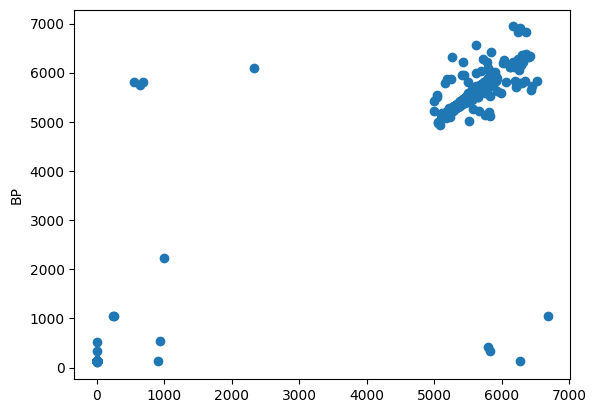

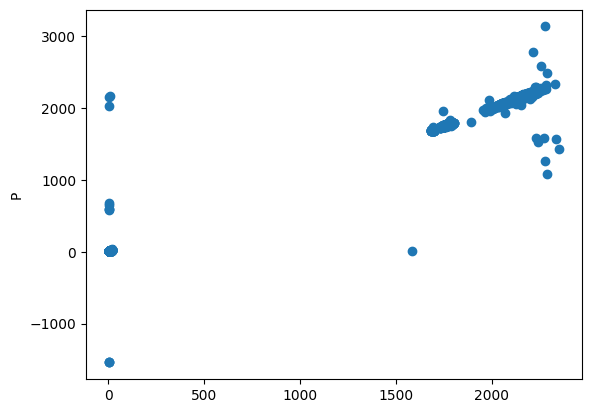

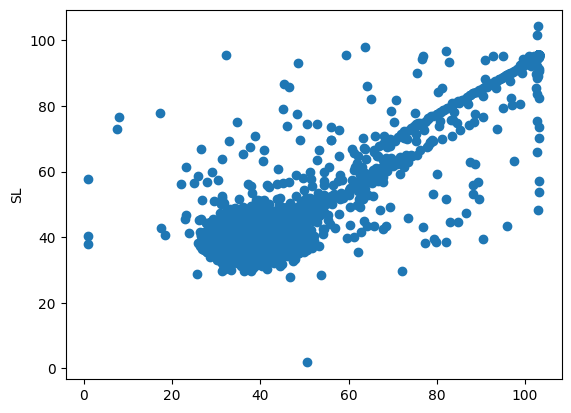

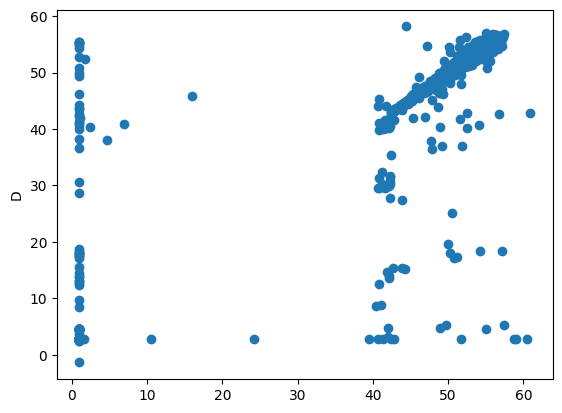

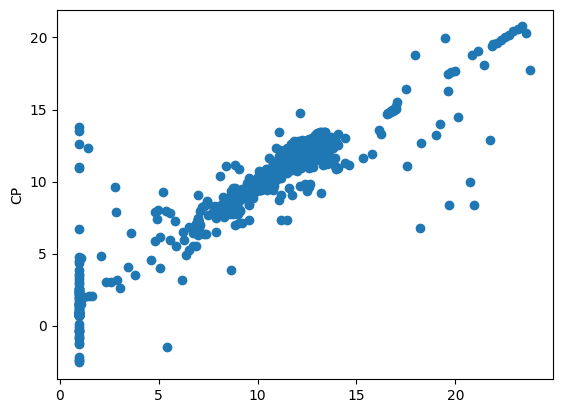

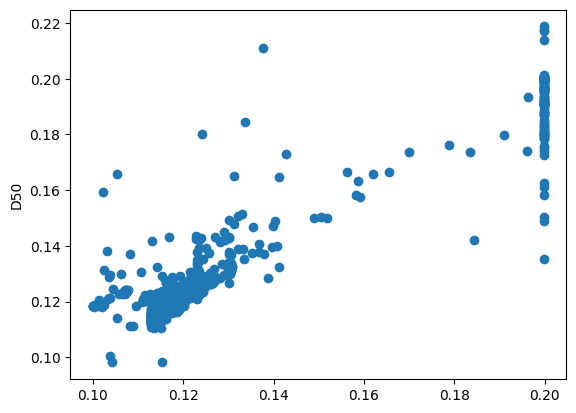

In [167]:
# testing on test data

dft= test.copy() #this is test 

mean=train[CV].mean()

# Split the test data into input and output variables
X_test = dft[MV] # test[:,2:]
y_test = dft[CV] # test[:,1]

mse=np.zeros(len(models))
r2 =np.zeros(len(models))
mae=np.zeros(len(models))
mae_per=np.zeros(len(models))


# Make predictions on the test set

for i, tag in enumerate(models.keys()):
    y_pred = models[tag].predict(dft)
    plt.figure(i)
    plt.scatter(y_test[tag],y_pred)
    plt.ylabel(tag)
    #subplots. do in sep for loop
#     plt.figure(i,figsize=(5,5))
#     plt.scatter(y_pred,dft[tag])
#     plt.grid()
    #plt.show()
    
    # Calculate the mean squared error
    r2[i]  = r2_score(y_test[tag], y_pred)
    mse[i] = mean_squared_error(y_test[tag], y_pred)
    mae[i] = mean_absolute_error(y_test[tag], y_pred)
    mae_per[i] = mae[i]/mean[i] *100

    
# print(y_test.columns)
# print('Mean Squared Error:', mse)
# print('R_Squared', r2)

print('Testing Results')
for i, tag in enumerate(CV):
    print(tag)
    print('-------')

    print('MSE:     ', f'{mse[i]:.4f}')
    print('MAE:     ', f'{mae[i]:.4f}')
    print('R2:      ', f'{r2[i]:.4f}')
    print('MAE/mean ',f'{mae_per[i]:.4f}', '%')
    print('mean     ',f'{mean[i]:.4f}')
    print('')
    
#print(f'{x:.2f}') for rounding

In [ ]:
test.describe()

In [168]:
#Show best coef:

for tag in CV:
    print(tag)
    print('-------')
    print('na: ', models[tag].na_best)
    print('nb: ', models[tag].nb_best)
    print('nk: ', models[tag].nk_best)
    print('')


BP
-------
na:  2
nb:  2
nk:  0

P
-------
na:  1
nb:  2
nk:  0

SL
-------
na:  2
nb:  2
nk:  1

D
-------
na:  2
nb:  2
nk:  1

CP
-------
na:  2
nb:  2
nk:  0

D50
-------
na:  2
nb:  2
nk:  0



In [63]:
#Plot window:

n_fig = len(models)
fig = make_subplots(rows=6, cols=1, horizontal_spacing=0.1, vertical_spacing=0.02)
n_row = 1
n_col = 2
cnt = 0
for ind, tag in enumerate(models.keys()):
    if ind not in [7,7]:
        fig.add_trace(
            go.Scatter(y=models[tag].Y_pred[800:1300], name=tag + ' Pred', legendgroup=cnt+1),
            row=cnt+1, col=1
        )
        fig.add_trace(
            go.Scatter(y=models[tag].Y_real[800:1300], name=tag + ' Meas', line=dict(dash='dashdot'), legendgroup=cnt+1),
            row=cnt+1, col=1,
        )
        fig['layout']['yaxis'+str(cnt+1)]['title']=tag

        cnt += 1

fig['layout']['xaxis'+str(cnt)]['title']='Time'

fig.update_layout(height=1550, width=500, legend_tracegroupgap = 195)
fig.show()
fig.write_html("_modeling_05.html")